In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
connections = [['Root', 'A'], [ 'Root', 'B'], ['Root', 'D'], ['D', 'E'], ['D', 'G'], ['A', 'C'], ['C', 'F'], ['F', 'G'], ['F', 'H']]
reversed_connections = [[conn[1], conn[0]] for conn in connections]

Paths = [['Root', 'A', 'C'], ['Root', 'A', 'C', 'F', 'G'], ['Root', 'A', 'C', 'F', 'H'], [ 'Root', 'B'], ['Root', 'D', 'E'], ['Root', 'D', 'G', 'F']]

Station_names = ['Root', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Station_locations = [[1, 0], [0, 0], [2, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [0, 3]]
Connected_to = [['A', 'B', 'D'], ['Root', 'C'], ['Root'], ['A', 'F'], ['Root', 'E', 'G'], ['D'], ['C', 'G', 'H'], ['D', 'F'], ['F']]

data = {
    'Station_names': Station_names,
    'Station_locations': Station_locations,
    'Connected_to': Connected_to
}

df_stations = pd.DataFrame(data)

In [24]:
df_stations

,Station_names,Station_locations,Connected_to
0,Root,"[1, 0]","[A, B, D]"
1,A,"[0, 0]","[Root, C]"
2,B,"[2, 0]",[Root]
3,C,"[0, 1]","[A, F]"
4,D,"[1, 1]","[Root, E, G]"
5,E,"[2, 1]",[D]
6,F,"[0, 2]","[C, G, H]"
7,G,"[1, 2]","[D, F]"
8,H,"[0, 3]",[F]


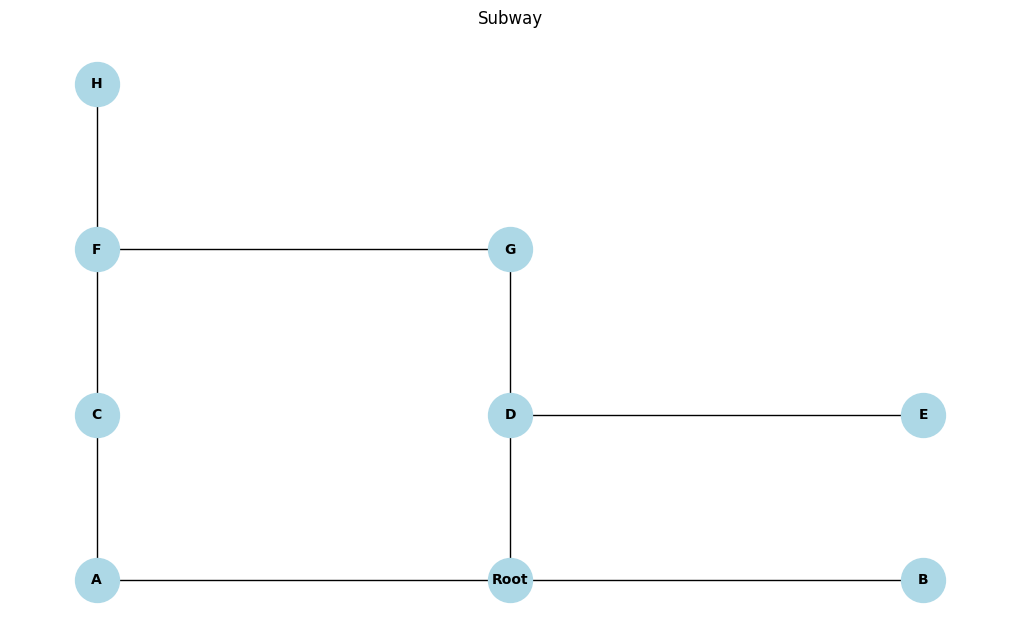

In [29]:
G = nx.Graph()

# Add nodes to the graph
for i, row in df_stations.iterrows():
    G.add_node(row['Station_names'], pos=row['Station_locations'])

# Add edges to the graph
for i, row in df_stations.iterrows():
    for dest in row['Connected_to']:
        G.add_edge(row['Station_names'], dest)

# Get positions of nodes
pos = nx.get_node_attributes(G, 'pos')

# Plot the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Subway')
plt.show()